# _Kapitel 7_
# Signalverarbeitung im Spektralbereich
## Motivation
In den vorigen Abschnitten wurden Signale im Zeitbereich dargestellt. Anhand eines einfachen Experimentes lässt sich zeigen, dass die Interpretation eines relativ einfach erzeugten Zeitsignals, z.B. durch Addition dreier Sinusschwingungen bereits zu erheblichen Schwierigkeiten führt. Dem Betrachter des Ergebnisses dieser Addition von Sinusschwingungen unterschiedlicher Frequenz und Amplitude wird es kaum gelingen, die Erzeugung der Kurvenform nachzuvollziehen. Eine Signalanalyse im Zeitbereich gestaltet sich je nach Anwendungsfall also schwierig oder gar unmöglich.

<Figure size 288x144 with 0 Axes>

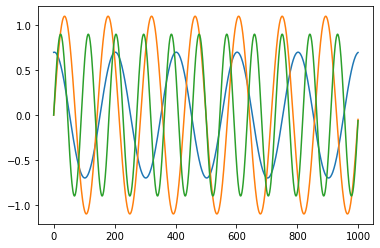

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
m=1000        # Anzahl samples
f1=5          # Frequenz
f2=7          # Frequenz
f3=11         # Frequenz
y1=[0.7*math.sin(2*math.pi*f1*x/m+1.5) for x in range(m)]
y2=[1.1*math.sin(2*math.pi*f2*x/m) for x in range(m)]
y3=[0.9*math.sin(2*math.pi*f3*x/m) for x in range(m)]
plt.figure(figsize=(4,2))
fig, ax = plt.subplots()
ax.plot(y1)
ax.plot(y2)
ax.plot(y3)
plt.show()

Wir bilden jetzt die Addition der drei einzelnen Sinusschwingungen verschiedener Frequenz und Amplitude:

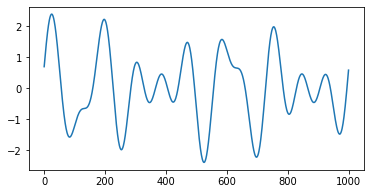

In [ ]:
y=[0]*m
for i in range(m): y[i]=y1[i]+y2[i]+y3[i]
plt.figure(figsize=(6,3))
plt.plot(y)
plt.show()

Dem Summensignal sind die einzelnen Frequenzkomponenten nicht mehr anzusehen. Erst ein spezielles mathematisches Verfahren, die sog. Fouriertransformation liefert uns wieder die gewünschten Informationen dazu:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

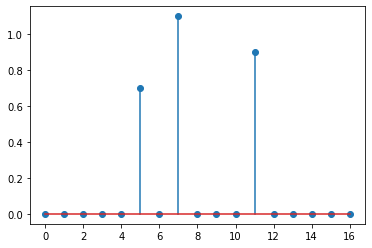

In [ ]:
f=np.fft.rfft(y)                # Fouriertransformation eines reellen Eingangssignals -> komplexes Ausgangssignal
f=abs(f)                        # Betragsbildung liefert sqrt(re*re+im*im) -> reelles Amplitudenspektrum
for i in range(m//2): f[i]/=m/2 # Skalierung
plt.stem(f[:17])

## Signaldarstellung im Spektralbereich

Durch den Übergang auf eine andere Darstellung (Transformation) des gemessenen Zeitverlaufs ist die Entstehung des Signals leicht nachvollziehbar. Bei der Darstellung im unteren Plot der letzten Folie wird die Signalamplitude über der Signalfrequenz aufgetragen. Deutlich ist sichtbar, dass im Zeitsignal die drei Frequenzen 5Hz, 7Hz und 11Hz mit den Amplituden 0.7, 1,1 und 0.9 enthalten sind. Die Darstellung eines Zeitsignals im Frequenzbereich wird als Spektrum, die Transformation dazu als Spektraltransformation bezeichnet. Die Grundlagen zu dieser als Fourier-Analyse bezeichneten Transformation legte bereits 1822 der Mathematiker J. B. Fourier.

## Die Fourier-Transformation

Die Fourier-Transformation (FT) ermöglicht es, die in einem Zeitsignal enthaltenen Frequenzen zu ermitteln. Messungen im Frequenzbereich werden meist bei Signalen mit periodischen Komponenten durchgeführt. Hier empfiehlt es sich, eine Harmonische Analyse oder Spektralanalyse durchzuführen und das Spektrum der Signale auszuwerten. 
Dazu wird das Zeitsignal für eine gewisse Zeit (Blocklänge) beobachtet und abgetastet. Der Abtastwertesatz wird zwischengespeichert und aus dem Datenblock wird das Spektrum mittels einer Spektraltransformation berechnet. 
Bei der kontinuierlichen Fourier-Transformation handelt es sich um eine verlustfreie Transformation, aus der das Originalsignal wieder vollständig rekonstruiert werden kann.
Bevor auf die Anwendung der Fourier-Transformation für zeitdiskrete Signale eingegangen wird, sei an das Fourier-Transformationspaar für zeitkontinuierliche Signale erinnert:
\begin{equation*}
F(j \omega) = \int _{-\infty} ^\infty f(t) e^{-j \omega t} dt
\end{equation*}

\begin{equation*}
f(t) = 1/2\pi \int _{-\infty} ^\infty F(j \omega) e^{j \omega t} dt
\end{equation*}

## Signaldarstellung im Spektralbereich

Die Spektralfunktion _F( jω )_ ist eine komplexe Funktion mit Real- und Imaginärteil bzw. Betrag und Phase. Oft wird nur der Betrag |_F( jω )_| in Abhängigkeit von ω oder f berechnet und als Amplitudenspektrum dargestellt. 

Stellt die Zeitfunktion _f(t)_ den Verlauf einer Spannung mit der Einheit V dar, so hat die Spektralfunktion wegen der Integration über die Zeit die Einheit Vs = V/Hz.

## Die diskrete Fourier-Transformation

Nach diesem Rückblick auf die Grundlagen der kontinuierlichen Fourier-Transformation wird der Unterschied zur Anwendung der diskreten Fourier-Transformation auf zeitbegrenzte Signale deutlich. Das Zeitsignal wird zu den Zeitpunkten _tn=nTa_ abgetastet, wobei _n_=0,...,_N_-1. _Ta_ bezeichnet das Abtastintervall bei äquidistanter Abtastung. Die gesamte Messzeit ist _T=NTa_. Die abgetasteten Werte der Funktion _f(t)_ sind nur an den diskreten Zeitpunkten _nTa_ bekannt. Aus der kontinuierlichen Variablen _t_ wird die diskrete Variable _nTa_.

Die diskrete Fourier-Transformation (DFT) berechnet aus den Werten _f(nTa)_ die Transformierte _Fd(jω)_. Durch den Index _d_ wird die DFT von der kontinuierlichen Fourier-Transformation unterschieden. Um eine Rechenvorschrift für die DFT zu erhalten, sind die kontinuierlichen Variablen der FT durch diskrete Variablen zu ersetzen:
-  _t_ durch _nTA_,
- _f(t)_ durch _f(nTa)_
usw.

Weiterhin ist das Integral entsprechend durch eine Summe von Rechtecken mit der Höhe f(nTa) und der Breite Ta zu approximieren. Die Multiplikation mit dem Abtastintervall wird nicht in die Definition der DFT aufgenommen:

\begin{equation*}
\underline{F}(j \omega) = \sum _{n=0} ^{N-1} f(nT_a) e^{-j \omega nT_a}
\end{equation*}

Aus dieser Darstellung der DFT lassen sich wichtige Eigenschaften ableiten:
- Ist die Zeitfunktion gerade, also _fn=f-n_, so ist auch die Spektralfunktion gerade und reell.
- Ist die Zeitfunktion ungerade, also _fn=-f-n_, so ist auch die Spektralfunktion ungerade und imaginär.
- Ist die Zeitfunktion reellwertig, so ist die Spektralfunktion komplex.
- _F( jω )_ und _F( -jω )_ sind konjugiert komplex.
- Die DFT ist über _ω_ periodisch mit der Periode _2πTa_.
- Die DFT ist erst nach einer Multiplikation mit dem Abtastintervall _Ta_ in Größe und Einheit äquivalent zur FT.
- Die DFT ist nur für diskrete Werte von _ωk_ zu berechnen (wegen der Begrenzung auf ein Beobachtungsfenster)

Aus der ersten Besonderheit der DFT zeigt sich eine Periodizität des Spektrums mit  _ω  = z 2π / Ta_, wobei _z_ eine beliebige ganze Zahl _z_=1,2,... bedeutet. Während eine periodische Zeitfunktion ein diskretes Spektrum zeigt, ist das Spektrum einer diskreten Zeitfunktion periodisch. 

### SHANNONsches Abtasttheorem
Aus dieser Periodizität der DFT lässt sich die Forderung an die Abtastfrequenz _fa_ ableiten: Die sich wiederholenden Spektren der DFT dürfen sich nicht überlappen, um sich nicht zu verfälschen. Dies ist dann der Fall, wenn die höchste Signalfrequenz _fmax_ kleiner als die Hälfte der Abtastfrequenz _fa_ ist,

\begin{equation*}
f_{max} \le 1/2 f_a, \omega_{max}\le \pi/T_a
\end{equation*}

Diese Ungleichung wird als Shannonsches Abtasttheorem im Frequenzbereich bezeichnet.



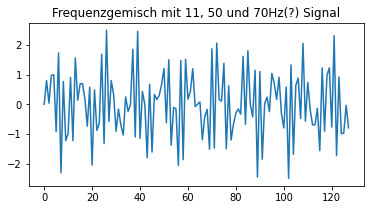

In [ ]:
# Beispiel für die Verletzung des Shannonschen Abtasttheorems:
import numpy as np
import matplotlib.pyplot as plt
import math
m=128         # Samplerate 128S/s 
f1=11         # Frequenz 11Hz
f2=50         # Frequenz 50Hz 
f3=70         # Frequenz 70Hz (hier tritt Aliasing auf, da die max. zulässige Frequenz bei <64Hz liegt)
y1=[0.7*math.sin(2*math.pi*f1*x/m) for x in range(m)]
y2=[1.1*math.sin(2*math.pi*f2*x/m) for x in range(m)]
y3=[0.9*math.sin(2*math.pi*f3*x/m) for x in range(m)]
y=[0]*m
for i in range(m): y[i]=y1[i]+y2[i]+y3[i]
plt.figure(figsize=(6,3))
plt.title("Frequenzgemisch mit 11, 50 und 70Hz(?) Signal")
plt.plot(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

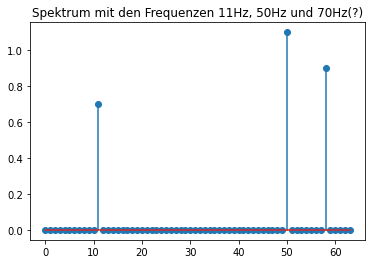

In [ ]:
f=np.fft.rfft(y)                # Fouriertransformation eines reellen Eingangssignals -> komplexes Ausgangssignal
f=abs(f)                        # Betragsbildung liefert sqrt(re*re+im*im) -> reelles Amplitudenspektrum
for i in range(m//2): f[i]/=m/2 # Skalierung
plt.title("Spektrum mit den Frequenzen 11Hz, 50Hz und 70Hz(?)")
plt.stem(f[:m//2])

Die laut dem Shannonschen Abtasttheorem nicht erlaubte Frequenz von 70Hz wird an der maximal zulässigen Frequenz von 64Hz "gespiegelt", d.h. auf 58Hz abgebildet. Die nicht korrekt digitalisierte Frequenzkomponente führt zu Fehlinterpretationen und muss durch ein Anti-Aliasing-Filter (TP) vor der Ananlog/Digital-Wandlung unterdrückt werden. Solche Spiegelfrequenzen treten aber auch nach der Digitalisierung z.B. bei Downsampling (Unterabtastung) innerhalb der digitalen Signalverarbeitung auf. In diesem Fall (und nur da!) können sie durch digitale Tiefpassfilter vermieden werden. 

### Diskrete Darstellung der Fourier-Transformation ohne Frequenzbezug

Bezeichnet man _Fd(jω)_ als Folge _X(k)_ und entsprechend _f(nTa)_ als _x[n]_, so lässt sich die DFT schreiben als 

\begin{equation*}
\underline{X}(f_k) = \underline{X}(k) = \sum _{n=0} ^{N-1} x_n e^{-j 2 \pi / N k n}
\end{equation*}

Der Index _n_ bezeichnet den _n_-ten Wert der Folge im Zeitbereich und entspricht dem Zeitpunkt _nTa_, der Index _k_ hingegen die _k_-te Spektrallinie der transformierten Folge im Frequenzbereich bei der Frequenz _fk_ = _k fa/N_.

Die DFT lässt sich definieren, ohne auf die Frequenzinterpretation Bezug zu nehmen. In dieser Art ist die DFT in den meisten Softwarepaketen implementiert.

Ist _N_ eine Potenz von 2, dann lassen sich besonders effiziente Algorithmen finden, um die DFT durchzuführen. Diese werden unter dem Namen schnelle Fourier-Transformation zusammengefasst (engl. _F_ast _F_ourier _T_ransform = FFT).



## Die DFT einer Exponentialfolge

Ein periodisches Signal mit der Periode _T_ und der Kreisfrequenz _ω_ lässt sich in Form einer komplexen Fourierreihe schreiben als:

\begin{equation*}
x(t) = x(t+T) = \sum _{m=-\infty} ^{+\infty} c_m e^{-j m \omega t}
\end{equation*}

Da die DFT eine lineare Transformation ist, genügt es, die Wirkung auf eine Frequenzkomponente zu bestimmen, deren Frequenz nun mit _fso_ bezeichnet werden soll. Die Periode ist damit _Tso_. Die Gesamttransformation ist dann die Linearkombination der DFT aller Frequenzkomponenten. Die Exponentialfolge, die sich aus der Abtastung bei der Frequenz _fso_ ergibt ist:

\begin{equation*}
x_n = e^{-j 2 /pi f_{S0} n T_a}, n=0,1,2,...,N-1
\end{equation*}

Die DFT der Exponentialfolge ergibt (ohne Beweis):

\begin{equation*}
\underline{X}(k) = e^{\pi j y (1-1/N)} \frac{2 j sin(\pi y)}{2 j sin(\pi y / N)}
\end{equation*}
mit
\begin{equation*}
y = (f_{S0} N T_a - k)
\end{equation*}

Das Ergebnis ist nun für verschiedene Fälle zu untersuchen:
- Ein konstantes Signal wird abgetastet (Fall 1)
- Die Abtastung erfolgt über eine ganzzahlige Anzahl von Signalperioden
- Der Abtastzeitraum umfasst keine ganzzahlige Anzahl von Signalperioden

#### Fall 1: Ein konstantes Signal wird abgetastet
Ein konstantes Signal _x(t)_=1=_const_ kann man formal als ein Signal mit der Frequenz _fso=0_ auffassen.

Für das Spektrum gilt dann:
\begin{equation*}
X(f_{S0}) = N
\end{equation*}

#### Fall 2: Der Abtastzeitraum umfasst eine ganzzahlige Anzahl von Signalperioden

Der Abtastzeitraum _NTa_ umfasst eine ganze Anzahl von Perioden des Signals, d.h. es gibt eine ganze Zahl _m_ mit

\begin{equation*}
N T_a = m T_{S0}, m=1,2,3,...
\end{equation*}
 
Dann entspricht die abgetastete Frequenz genau einer Spektrallinie der DFT.

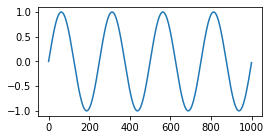

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
m=1000        # Anzahl samples
f=4           # Frequenz
y1=[math.sin(2*math.pi*f*x/m) for x in range(m)]
plt.figure(figsize=(4,2))
plt.plot(y1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

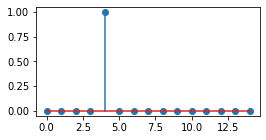

In [ ]:
f=np.fft.rfft(y1)                # Fouriertransformation eines reellen Eingangssignals -> komplexes Ausgangssignal
f=abs(f)                        # Betragsbildung liefert sqrt(re*re+im*im) -> reelles Amplitudenspektrum
for i in range(m//2): f[i]/=m/2 # Skalierung
plt.figure(figsize=(4,2))
plt.stem(f[:15])

#### Fall3: Der Abtastzeitraum umfasst keine ganze Anzahl Signalperioden

Nur bei bekannten Frequenzen des zu analysierenden Signals kann die Abtastdauer so gewählt werden, dass alle vorkommenden Frequenzen eine ganze Anzahl von Perioden umfassen. Dies ist auch nur für periodische Signale möglich. Im Normalfall wird der Abtastzeitraum keine ganze Anzahl von Perioden des Signals umfassen. Dann gibt es eine ganze Zahl m und einen Wert a mit:

\begin{equation*}
N T_a = (m+\alpha) T_{S0}, 0\lt \alpha \lt 1
\end{equation*}
 


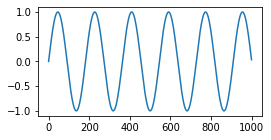

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
m=1000        # Anzahl samples
f=5.5      # Frequenz
y2=[math.sin(2*math.pi*f*x/m) for x in range(m)]
plt.figure(figsize=(4,2))
plt.plot(y2)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

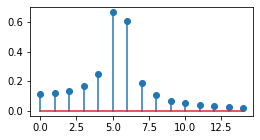

In [ ]:
f=np.fft.rfft(y2)               # Fouriertransformation eines reellen Eingangssignals -> komplexes Ausgangssignal
fc=f.copy()
f=abs(f)                        # Betragsbildung liefert sqrt(re*re+im*im) -> reelles Amplitudenspektrum
for i in range(m//2): f[i]/=m/2 # Skalierung
plt.figure(figsize=(4,2))
plt.stem(f[:15])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


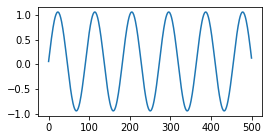

In [ ]:
t=np.fft.ifft(fc) 
plt.figure(figsize=(4,2))
plt.plot(t)

Für den Fall
\begin{equation}
\alpha \ne 0
\end{equation}
bedeutet das, dass sich die Signalenergie auf mehrere Punkte rechts und links der „richtigen“ Frequenz aufteilt. 
Die Form des Spektrums bleibt zwar im wesentlichen unverändert, nur wird das Betragsspektrum in k-Richtung so verschoben, dass die ganzzahligen Werte von k nicht mehr auf das Maximum bzw. die Nullpunkte zu liegen kommen. 

## Der Leck-Effekt

Durch die Wahl von a ungleich Null entstehen zwei Arten von Fehlern:
- Die Hüllkurve wird nicht mehr im Maximum abgetastet.
- Auch an allen anderen punkten der DFT entstehen fehlerhafte Anteile. Dies wird als Leck-Effekt (engl. leakage effect) bezeichnet.

Das Zustandekommen des Leck-Effekts kann auf zwei Arten erklärt werden:

1.: Für alpha ungleich Null bekommt man eine unstetige Fortsetzung der Funktion, die andere Spektralkomponenten hat wie die Funktion, die man analysieren wollte. Für das unstetig fortgesetzte Signal werden dann die korrekten Fourierkoeffizienten berechnet.

2.: Bei der Fouriertransformation gilt der Zusammenhang zwischen den Produkten und Faltungen:

		Zeitbereich			Frequenzbereich
		Faltung		≡		Produkt
		Produkt		≡		Faltung

Die zeitkontinuierliche Fourier-Transformation einer zeitbegrenzten Exponentialfunktion (rechteckförmiger Ausschnitt einer Cosinus- oder Sinusfunktion) ist ein sin(x)/x förmiger Verlauf im Spektralbereich. Der Betrag dieser Funktion wird an diskreten Stellen abgetastet und ergibt den typischen Leckeffekt.

## Fensterfunktionen zur Reduktion des Leck-Effekts

Die Bildung eines Abtastzeitraums im Zeitbereich entspricht also der Faltung der Fouriertransformierten der Rechteckfunktion mit der Fouriertransformierten der Exponentialfunktion (Dirac-Impuls).

Man kann den Leck-Effekt verkleinern, wenn man anstelle des Rechteckfensters andere Fenster mit weniger scharfen Kanten verwendet, denn scharfe Kanten sorgen für hohe Frequenzkomponenten im Spektrum und damit für eine große Ausdehnung im Frequenzbereich.

#### Folgende Standardfenster wurden dazu entwickelt:


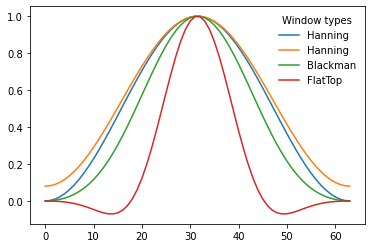

In [ ]:
from scipy import signal
m=64
w_hanning=np.hanning(m)
w_hamming=np.hamming(m)
w_blackman=np.blackman(m)
w_flattop=signal.flattop(m)
fig, ax = plt.subplots()
ax.plot(w_hanning, label="Hanning")
ax.plot(w_hamming, label="Hanning")
ax.plot(w_blackman, label="Blackman")
ax.plot(w_flattop, label="FlatTop")
ax.legend(loc="upper right", title="Window types", frameon=False)
plt.show()


## Wirkung der Fensterung

Die Wirkung der Fensterung im Zeitbereich ist am Beispiel eines Blackman Fensters dargestellt:

<Figure size 288x144 with 0 Axes>

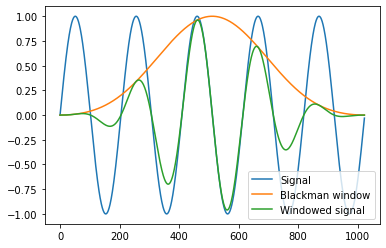

In [ ]:
m=1024
f=5           # Frequenz
y=[math.sin(2*math.pi*f*x/m) for x in range(m)]
w=np.blackman(m)
plt.figure(figsize=(4,2))
fig, ax = plt.subplots()
ax.plot(y, label="Signal")
ax.plot(w, label="Blackman window")
yw=[y[i]*w[i] for i in range(m)]
ax.plot(yw, label = "Windowed signal")
ax.legend()
plt.show()

Die Fensterung hat folgende Wirkung:
- Die Frequenzauflösung wird verschlechtert, und zwar in jedem Fall, d.h. auch für _a_=0. Für _a_ ungleich Null ist allerdings die Verschlechterung wesentlich geringer als für das Rechteckfenster, d.h. die von Null verschiedenen Spektralkomponenten sind um die „korrekte“ Frequenz herum konzentriert.
- Der Maximalwert des Spektrums wird herabgesetzt, d.h. der Wert _N_ bzw. _N_/2 wie im Fall des Rechteckfensters wird nicht erreicht. Die Höhe des Maximums hängt nur allerdings noch leicht von _a_ ab.

Die Größe des Maximums wird für _a_=0 durch den ersten Koeffizienten der Fensterfunktion bestimmt. Für die Standardfenster gelten folgende Werte:
- Rechteck: N/2
- Hanning:  0.5*(N-1)/2
- Hamming: 0.54*(N-1)/2
- Blackman: 0.42*(N-1)/2
- Flat Top: 0.218*(N-1)/2

### Fazit

Die Wahl der Fensterfunktion erlaubt einen Kompromiss zwischen der Genauigkeit der Amplitudenauswertung und der erreichbaren Frequenzauflösung. 

Die Genauigkeit der ermittelten Amplitude und die Ausdehnung im Frequenzbereich verhalten sich gegenläufig. 

So zeigt das Hamming Fenster die größte Abweichung der Amplitude und die kleinste Ausdehnung im Frequenzbereich. 

Beim Flat Top Fenster ist der Amplitudenfehler vernachlässigbar, jedoch ist die Ausdehnung im Frequenzbereich sehr groß.

Durch Kenntnis der ersten Koeffizienten der Fensterfunktionen kann der Verstärkungsfehler weitgehend kompensiert werden (Korrekturfaktor).

Verwendet man das Rechteckfenster, so wird sich auch im Idealfall _a_=0 eine Verbreiterung der Ausdehnung im Frequenzbereich ergeben. 
Nur wenn durch Synchronisation der ideale Abtastfall _a_ =0 eingehalten werden kann, was in der Regel dann der Fall ist, wenn das Generatorsignal irgendwie verfügbar ist, dann sollte mit einem Rechteckfenster abgetastet werden. In allen anderen Fällen muss man mit einer mehr oder weniger starken Verfälschung rechnen.




## Die schnelle Fourier-Transformation (FFT)

Die DFT arbeitet sowohl im Zeit- als auch im Frequenzbereich mit jeweils N diskreten Werten. Bei der Ausführung der Transformationsgleichung sind trigonometrische Funktionen zu berechnen und man benötigt zur Berechnung der Koeffizienten _N^2_ komplexe Multiplikationen und _N(N-1)_ komplexe Additionen. Deshalb wurde an der numerischen Optimierung von DFT-Algorithmen intensiv gearbeitet. Am bedeutendsten ist der von Cooley und Tukey 1965 angegebene Algorithmus, der für den Spezialfall, dass _N_ eine Zweierpotenz darstellt, anwendbar ist und als Fast Fourier Transform (FFT) bezeichnet wird.
Dieser Algorithmus benötigt nur noch ca. _N_ ld(_N_) komplexe Operationen. Folgende Tabelle zeigt den enormen Aufwandsunterschied bei steigender Anzahl _N_ von Abtastwerten:

_N_ | _N_^2  | _N_ ld(_N_)
----|--------|--------
32  | 1024   | 160
128 | 16384  | 896
2048|4194304 | 22528

Der Grundgedanke der FFT ist, die Summenformel für eine _N_-Punkte DFT so aufzuteilen, dass zwei Teilsummen entstehen, die jeweils für sich eine _N_/2-Punkte DFT repräsentieren, und diese Aufgabe so lange fortzusetzen, bis man bei einer 2-Punkte DFT angekommen ist und das Ergenis dann rekursiv zu berechnen.

Die Berechnung der FFT in Jupyter Notebooks (Python) erfolgt über:
- import numpy as np # numerische Bibliothek _numpy_ einbinden
- f = np.fft.rfft(y) # FFT eines reellen Eingangssignals -> komplexes Ausgangssignal
- f = abs(f) # Betragsbildung bzw. sqrt(re * re + im * im) -> reelles Amplitudenspektrum
- for i in range(m//2): f[i]/=m/2 # ggf. Skalierung


In [ ]:
# Returns the integer whose value is the reverse of the lowest 'bits' bits of the integer 'x'.
def _reverse(x, bits):
    y = 0
    for i in range(bits):
        y = (y << 1) | (x & 1)
        x >>= 1
    return y


# Returns the integer y such that 2^y == x, or raises an exception if x is not a power of 2.
def _log2(x):
    i = 0
    while True:
        if 1 << i == x:
            return i
        elif 1 << i > x:
            raise ValueError("Not a power of 2")
        else:
            i += 1

def transform_radix2(vector, inverse=False): # Beispiel für eine FFT in Python
    # Initialization
    n = len(vector)
    levels = _log2(n)
    exptable = [cmath.exp((2j if inverse else -2j) * cmath.pi * i / n) for i in range(n // 2)]
    vector = [vector[_reverse(i, levels)] for i in range(n)]  # Copy with bit-reversed permutation
    
    # Radix-2 decimation-in-time FFT
    size = 2
    while size <= n:
        halfsize = size // 2
        tablestep = n // size
        for i in range(0, n, size):
            k = 0
            for j in range(i, i + halfsize):
                temp = vector[j + halfsize] * exptable[k]
                vector[j + halfsize] = vector[j] - temp
                vector[j] += temp
                k += tablestep
        size *= 2
    return vector

## PARSEVALsche Gleichung

Die Parsevalsche Gleichung beschreibt für die verschiedenen Varianten der Spektralanalyse die wichtige Tatsache, dass die Signalenergie nicht nur aus dem Signal selbst, sondern auch aus seinem Spektrum berechnet werden kann (Energieerhaltung). Für die DFT bzw. FFT gilt:

\begin{equation*}
1/N \sum _{k=0} ^{N-1} x^2 (k) = \sum _{n=0} ^{N-1} |\underline{X}(n)|^2
\end{equation*}


## GIBBSsches Phänomen

Das Gibbs´sche Phänomen beschreibt eine Eigenschaft der Approximation einer Funktion mit Sprungstellen mit einer Fourier-Reihe. Eine Rechteckschwingung setzt sich z.B. aus einem DC-Anteil von 0, einer Grundschwingung von 1/π, einer 3. Harmonischen mit der Amplitude 1/(3π) usw. zusammen:


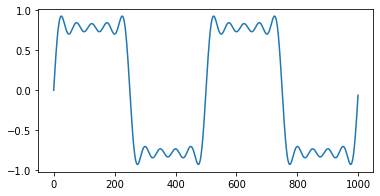

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
m=1000        # Anzahl samples
f1=2          # Grundfrequenz
f2=6          # 3. Harmonische
f3=10         # 5. Harmonische
f4=14         # 7. Harmonische
f5=18         # 9. Harmonische
y1=[1/1*math.sin(2*math.pi*f1*x/m) for x in range(m)]
y2=[1/3*math.sin(2*math.pi*f2*x/m) for x in range(m)]
y3=[1/5*math.sin(2*math.pi*f3*x/m) for x in range(m)]
y4=[1/7*math.sin(2*math.pi*f4*x/m) for x in range(m)]
y5=[1/9*math.sin(2*math.pi*f5*x/m) for x in range(m)]
y=[0]*m
for i in range(m): y[i]=y1[i]+y2[i]+y3[i]+y4[i]+y5[i] # Synthese der Rechteckschwingung aus sinusförmigen Teilschwingungen
plt.figure(figsize=(6,3))
plt.plot(y)
plt.show()

Im Bild ist die Approximation der Rechteckschwingung durch die ersten fünf Harmonischen dargestellt. Das Überschwingen an beiden Flanken um je ca. 9% der Amplitude ist von der Anzahl der Koeffizienten unabhängig und wird als Gibbs´sches Phänomen bezeichnet.

Dieses Überschwingen tritt nach jeder Signalrekonstruktion bei Spektralanalysen mit einer endlichen Zahl von Koeffizienten auf und ist eine unerwünschte, jedoch unvermeidliche Eigenschaft der Fourier-Reihe. 

Folgendes Beispiel zeigt die Wirkung bei einer Fourieranalyse und -Synthese.
 
### Erzeugung eines Rechtecksignals

Ein Rechtecksignal kann in Python mittels der Bibliothek scipy.signal erzeugt werden:


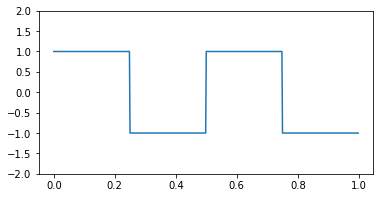

In [ ]:
from scipy import signal
m=512
t = np.linspace(0, 1, m, endpoint=False)
plt.figure(figsize=(6,3))
yr=signal.square(2 * np.pi * 2 * t)
plt.plot(t, yr)
plt.ylim(-2, 2)
plt.show()

### Fourieranalyse und Rekonstruktion des Rechtecksignals

Das Rechtecksignal wird nun mittels einer FFT in seine Spektralkoeffizienten zerlegt und wieder zurück in den Zeitbereich transormiert:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


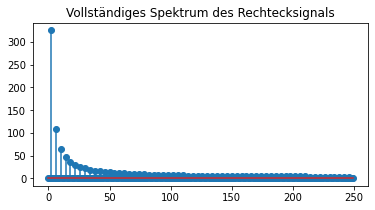

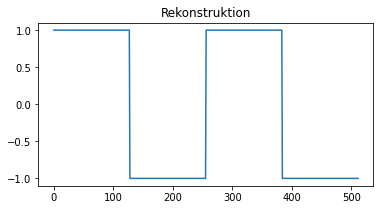

In [ ]:
f=np.fft.fft(yr)                 # Fouriertransformation eines reellen Eingangssignals -> komplexes Ausgangssignal
fb=abs(f)                        # Betragsbildung liefert sqrt(re*re+im*im) -> reelles Amplitudenspektrum
#for i in range(m//2): f[i]/=m/2 # Skalierung
plt.figure(figsize=(6,3))
plt.title("Vollständiges Spektrum des Rechtecksignals")
plt.stem(fb[:250])
s=np.fft.ifft(f) # Rekonstruktion durch inverse (alle Koeffizienten)
plt.figure(figsize=(6,3))
plt.title("Rekonstruktion")
plt.plot(s)

### Rekonstruktion bei endlicher Anzahl von Fourierkoeffizienten

Dieses Beispiel erfolgt analog zum vorigen, jedoch ist die Anzahl der verwendeten Fourierkoeffizienten nun begrenzt. 

Dadurch wird das Gibbssche Phänomen deutlich erkennbar:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


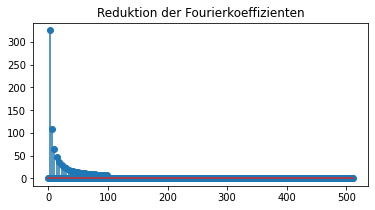

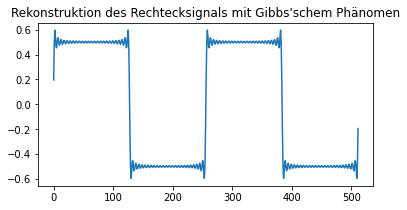

In [ ]:
df=f
for i in range(m-100): df[i+100]=0.0 # (Nullsetzen höherer Harmonischer)
bdf = abs(df)
plt.figure(figsize=(6,3))
plt.title("Reduktion der Fourierkoeffizienten")
plt.stem(bdf)
s=np.fft.ifft(df) # Rekonstruktion durch inverse 
plt.figure(figsize=(6,3))
plt.title("Rekonstruktion des Rechtecksignals mit Gibbs'schem Phänomen")
plt.plot(s)
plt.show()